# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [2]:
library('tidyverse')
library('scales')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
vaccine_df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv', col_types = cols())
vaccine_df |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here
df_vacc_rates = vaccine_df |>
    filter(mmr >= 0) |>   
    group_by(state) |>
    summarize(N = n(),
              n_above_95 = sum(mmr >= 95, na.rm=TRUE),
              frac_above_95 = sum(mmr >= 95, na.rm=TRUE) / n())
df_vacc_rates |> head()

state,N,n_above_95,frac_above_95
<chr>,<int>,<int>,<dbl>
Arizona,1171,593,0.506404782
Arkansas,567,2,0.003527337
California,14225,12639,0.888506151
Colorado,1507,939,0.623092236
Connecticut,589,478,0.811544992
Illinois,7686,6893,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [5]:
nc_vaccine = vaccine_df |>
    filter(state == 'North Carolina') |>
    select(state, overall) |>
    arrange(overall) |> 
    mutate(fr = row_number() / n())

nc_vaccine |> head()

state,overall,fr
<chr>,<dbl>,<dbl>
North Carolina,-1.0,0.0004796163
North Carolina,21.7,0.0009592326
North Carolina,40.3,0.0014388489
North Carolina,42.9,0.0019184652
North Carolina,43.5,0.0023980815
North Carolina,45.0,0.0028776978


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

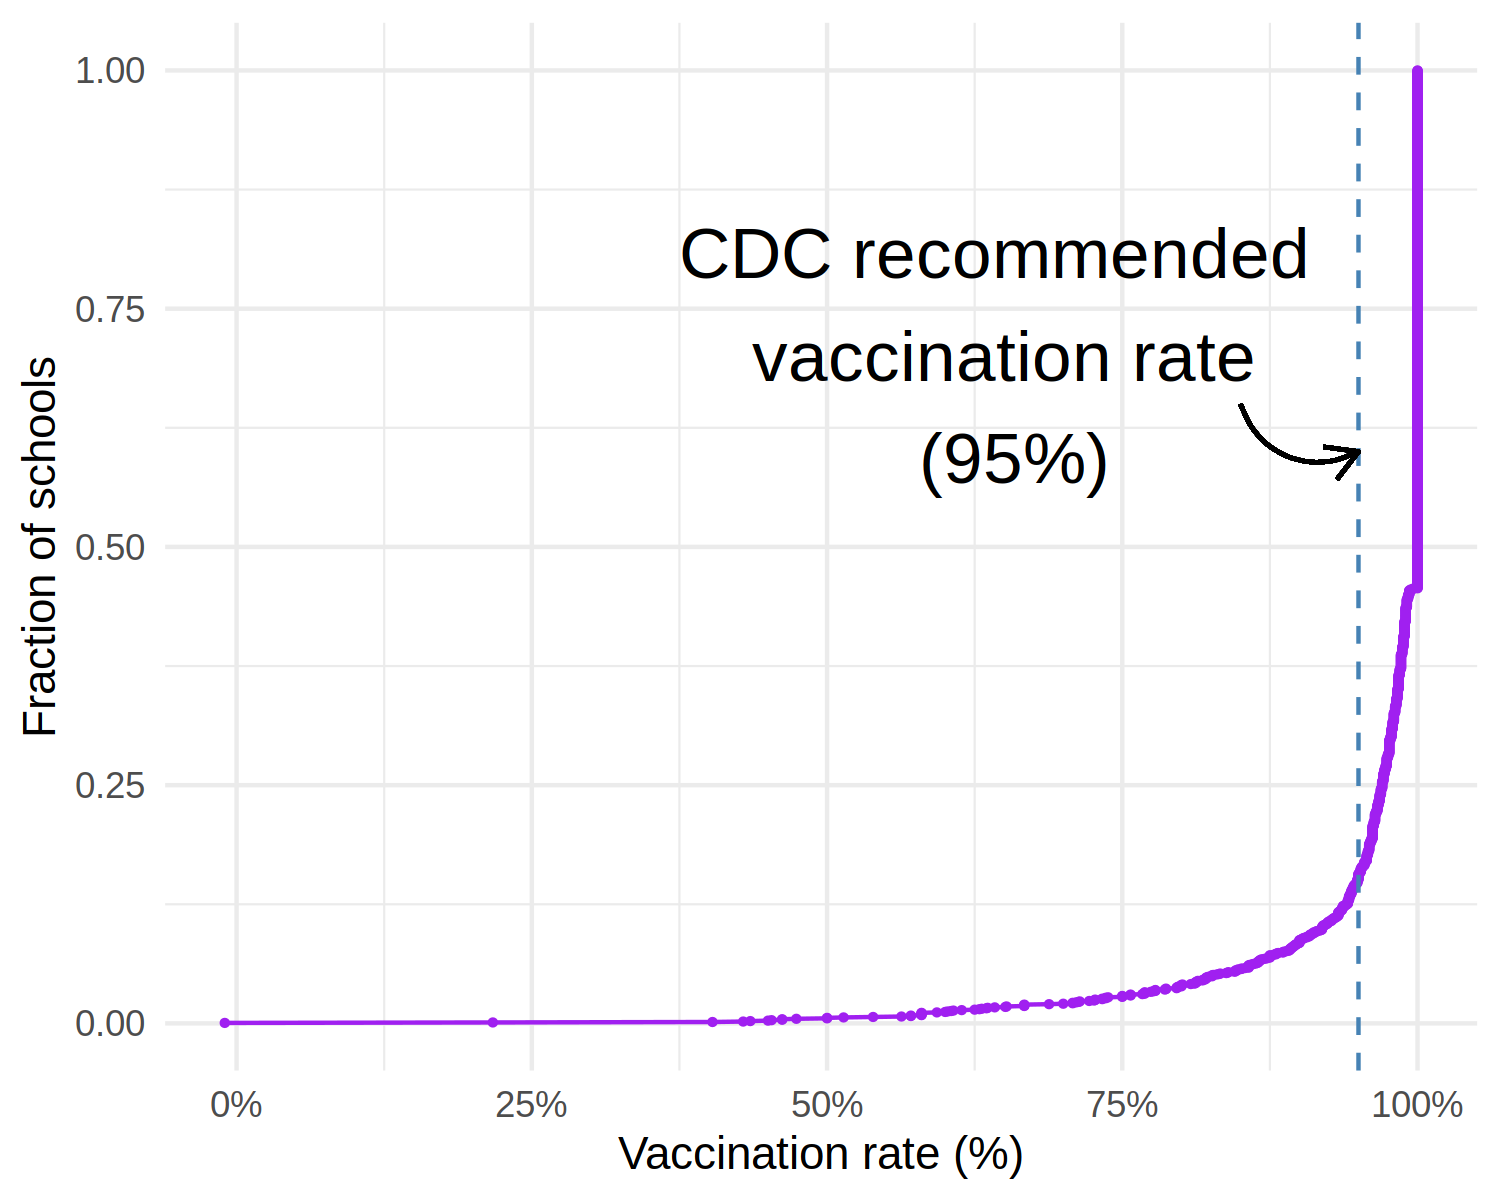

In [6]:
p = ggplot(nc_vaccine, aes(x = overall, y = fr)) + 
    geom_point(size = 0.5, color = 'purple') + 
    geom_line(size = 0.5, color = 'purple') + 
    geom_vline(xintercept = 95, lty = 2, color = 'steelblue') +
    annotate("text", x = 65, y = 0.7, label = "CDC recommended \n vaccination rate \n (95%)",size = 6) +
    geom_curve(aes(x = 85, y = 0.65, xend = 95, yend = 0.6), arrow = arrow(length = unit(0.3, 'cm'))) + 
    # text(x = 75, y = 75, labels = 'CDC recommended vaccination rate (95%)') +
    scale_x_continuous(labels = scales::percent_format(scale = 1)) +
    theme_minimal() + 
    labs(x = 'Vaccination rate (%)', y = 'Fraction of schools')
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

In [7]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [8]:
vaccine_df |>
    filter(state == 'North Carolina') |>
    summarize(median.overall = median(overall))

median.overall
<dbl>
100


The median rate is above the CDC recommended target. 